In [8]:
import numpy as np
import os 
import time
import matplotlib.pyplot as plt

In [9]:
from sound import *
from kernel_generator import *
from visualisation import *
from matching_pursuit import *
from learning import *

### Replication capacity with density of kernels and Noise

In [3]:
noise_kernels_generator = Gaussian_noise_generator(avg_length=16, fixed_length=True)
noise_dic = noise_kernels_generator.generate_kernels(8)

gauss_kernels_generator = Gaussian_distrib_generator(avg_length=16)
gauss_dic = gauss_kernels_generator.generate_kernels(8)

densities = np.linspace(0.05,0.55,11)

noise_scores = []
for density in densities:

    sounds_generator = Sound_generator(noise_dic, avg_length=100, avg_density=density)#, noise=0.01)
    sounds, bases = sounds_generator.generate_sounds(100) # Number of sound is chosen at random
    sounds_scores = []
    for sound in sounds:
        decomp, res = mp_decomposition(sound, noise_dic, threshold=0.1)
        if sound.norm()<=0.001:
            pass
        score = res.norm() / sound.norm()
        sounds_scores.append(score)
    #plot_sounds([sound, res], ['sound', 'residual'])
    density_score = np.stack(sounds_scores).mean()
    noise_scores.append(density_score)
    print('Score for density {}: {}'.format(density, density_score))
    
gauss_scores = []
for density in densities:

    sounds_generator = Sound_generator(gauss_dic, avg_length=100, avg_density=density)#, noise=0.01)
    sounds, bases = sounds_generator.generate_sounds(100) # Number of sound is chosen at random
    sounds_scores = []
    for sound in sounds:
        decomp, res = mp_decomposition(sound, gauss_dic, threshold=0.1)
        if sound.norm()<=0.001:
            pass
        score = res.norm() / sound.norm()
        sounds_scores.append(score)
    #plot_sounds([sound, res], ['sound', 'residual'])
    density_score = np.stack(sounds_scores).mean()
    gauss_scores.append(density_score)
    print('Score for density {}: {}'.format(density, density_score))
        
fig = plt.figure()
plt.plot(densities, noise_scores, label='noise kernels')
plt.plot(densities, gauss_scores, label='gaussian kernels')
plt.title('Evolution of reconstruction loss with kernel density')
plt.legend()
plt.savefig('reclossVSdensity_Gnoise.png')
plt.show()

KeyboardInterrupt: 

Score for noise 0.0: 0.05578200187605771
Score for noise 0.03: 0.09798260758062259
Score for noise 0.06: 0.11398884086317276
Score for noise 0.09: 0.1121086335369489
Score for noise 0.12: 0.11094879370165092
Score for noise 0.15: 0.11330604511161493
Score for noise 0.18: 0.11470081216336457
Score for noise 0.21: 0.10576407816423732
Score for noise 0.24: 0.1050047787745401
Score for noise 0.27: 0.1010735533890665
Score for noise 0.3: 0.10040556447046567
Score for noise 0.0: 0.08231576702593144
Score for noise 0.03: 0.12293661745870917
Score for noise 0.06: 0.18955361984598565
Score for noise 0.09: 0.2397466012774512
Score for noise 0.12: 0.28687622169567506
Score for noise 0.15: 0.345950678214813
Score for noise 0.18: 0.3897848577672419
Score for noise 0.21: 0.4180008069094271
Score for noise 0.24: 0.4437645817389416
Score for noise 0.27: 0.45619847548366493
Score for noise 0.3: 0.455545515304983


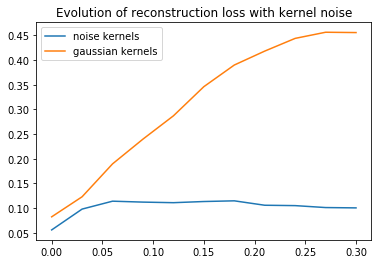

In [10]:
noise_kernels_generator = Gaussian_noise_generator(avg_length=16, fixed_length=True)
noise_dic = noise_kernels_generator.generate_kernels(8)

gauss_kernels_generator = Gaussian_distrib_generator(avg_length=16)
gauss_dic = gauss_kernels_generator.generate_kernels(8)

add_noise = np.linspace(0,0.3,11)

noise_scores = []
for noise in add_noise:

    sounds_generator = Sound_generator(noise_dic, avg_length=100, avg_density=0.15, noise=noise)#, noise=0.01)
    sounds, bases = sounds_generator.generate_sounds(100) # Number of sound is chosen at random
    sounds_scores = []
    for sound in sounds:
        decomp, res = mp_decomposition(sound, noise_dic, threshold=0.1)
        if sound.norm()==0:
            assert res.norm()==0
        score = res.norm() / sound.norm()
        sounds_scores.append(score)
    #plot_sounds([sound, res], ['sound', 'residual'])
    noise_score = np.stack(sounds_scores).mean()
    noise_scores.append(noise_score)
    print('Score for noise {}: {}'.format(noise, noise_score))
    
gauss_scores = []
for noise in add_noise:

    sounds_generator = Sound_generator(gauss_dic, avg_length=100, avg_density=0.15, noise=noise)#, noise=0.01)
    sounds, bases = sounds_generator.generate_sounds(100) # Number of sound is chosen at random
    sounds_scores = []
    for sound in sounds:
        decomp, res = mp_decomposition(sound, gauss_dic, threshold=0.1)
        if sound.norm()==0:
            assert res.norm()==0
        score = res.norm() / sound.norm()
        sounds_scores.append(score)
    #plot_sounds([sound, res], ['sound', 'residual'])
    noise_score = np.stack(sounds_scores).mean()
    gauss_scores.append(noise_score)
    print('Score for noise {}: {}'.format(noise, noise_score))
        
fig = plt.figure()
plt.plot(add_noise, noise_scores, label='noise kernels')
plt.plot(add_noise, gauss_scores, label='gaussian kernels')
plt.title('Evolution of reconstruction loss with kernel noise')
plt.legend()
plt.savefig('reclossVSnoise_Gnoise.png')
plt.show()

### Check dictionnary learning

In [3]:
# Generate dic, and trainable kernels (same nb?) generate k samples with density d and noise n, learn for e epochs
# Vary k, d, n (e)
# Metric: plot closest kernels, evaluate their L2 distance
# What happends when nb of kernels differ?

1.3043951742282782
1.2704965347300976
1.0775448818018194
1.1393660523781266
1.2671440555391176
1.4218439342983935
1.3042554617118103
1.3170872685459174
1.2296359772886551
1.142231336386061


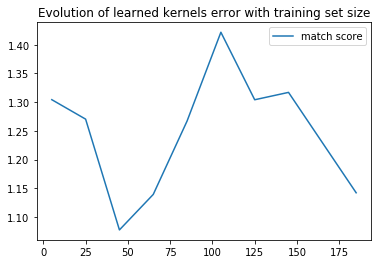

In [3]:
# Influence of dataset size (in number of samples)

noise_kernels_generator = Gaussian_noise_generator(avg_length=16, fixed_length=True)

target_dic_sizes = noise_kernels_generator.generate_kernels(5)

init_dic = noise_kernels_generator.generate_kernels(5)
best_learned_dic_sizes = init_dic.copy()
best_score = np.inf

n_samples_list = np.arange(5, 205, 20)

size_scores = []
for n_samples in n_samples_list:
    work_dic = init_dic.copy()
    sound_generator = Sound_generator(target_dic_sizes, avg_length=100, avg_density=0.15)
    sounds_set, bases = sound_generator.generate_sounds(n_samples)
    
    train(work_dic, sounds_set, n_epochs=10)
    
    matching, score = match_kernels(target_dic_sizes, work_dic, max_match=5)
    print(score)
    if score < best_score:
        best_learned_dic_sizes = work_dic.copy()
        best_score = score
        best_matching = matching
    
    size_scores.append(score)
    
last_learned_dic_size = work_dic.copy()
    
fig = plt.figure()
plt.plot(n_samples_list, size_scores, label='match score')
plt.title('Evolution of learned kernels error with training set size')
plt.legend()
plt.savefig('matchXsetsize.png')
plt.show()

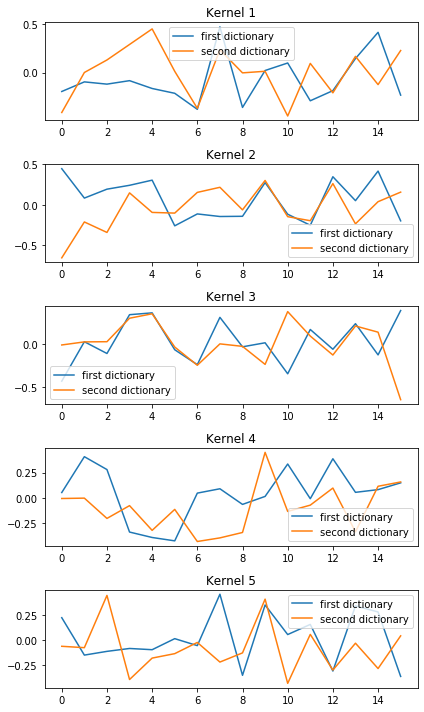

In [4]:
plot_dic_match(target_dic_sizes, best_learned_dic_sizes, best_matching, save='best_dic_sizes.png')

In [15]:
# Influence of dataset density (in kernels/sound length)

noise_kernels_generator = Gaussian_noise_generator(avg_length=16, fixed_length=True)

target_dic_density = noise_kernels_generator.generate_kernels(5)

init_dic = noise_kernels_generator.generate_kernels(5)
best_learned_dic_densities = init_dic.copy()
best_score = np.inf

densities_list = np.linspace(0.05,0.55,11)

density_scores = []
for density in densities_list:
    work_dic = init_dic.copy()
    sound_generator = Sound_generator(target_dic_density, avg_length=100, avg_density=density)
    sounds_set, bases = sound_generator.generate_sounds(75)
    
    train(work_dic, sounds_set, n_epochs=20)
    
    matching, score = match_kernels(target_dic_density, work_dic, max_match=5)
    print(score)
    if score < best_score:
        best_learned_dic_densities = work_dic.copy()
        best_matching_density = matching
    
    density_scores.append(score)


1.0460472731523542
1.117396907211739
1.2734857089149374
1.2521798413947702
1.1178312470648482
1.331763434447801
1.2965447398470133
1.3112370882198643
1.4069032665867331
1.2323934146243993
1.1887821680655621


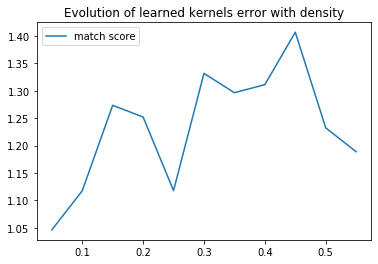

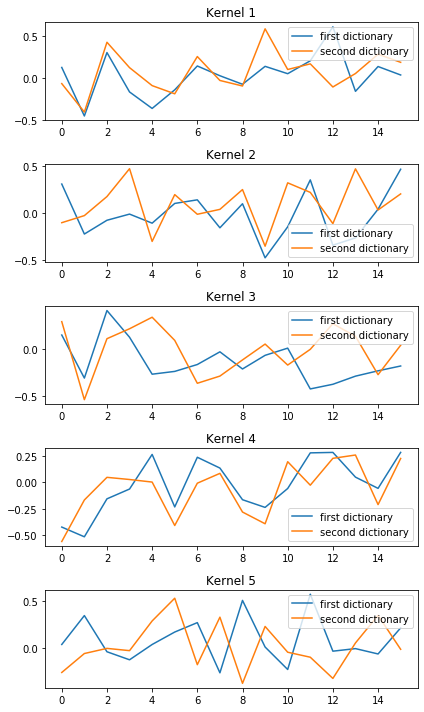

In [16]:
fig = plt.figure()
plt.plot(densities_list, density_scores, label='match score')
plt.title('Evolution of learned kernels error with density')
plt.legend()
plt.savefig('matchXdensity.png')
plt.show()

plot_dic_match(target_dic_density, best_learned_dic_densities, best_matching_density, save='best_dic_density.png')

### Precision/Rate when varying thresold

Done for noise = 0
Done for noise = 0.05
Done for noise = 0.1
Done for noise = 0.2


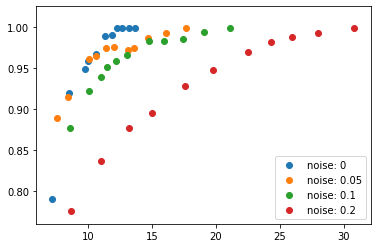

In [11]:
# Plot several curves with different level of noise

noise_kernels_generator = Gaussian_noise_generator(avg_length=16, fixed_length=True)
noise_dic = noise_kernels_generator.generate_kernels(8)

noise_levels = [0,0.05,0.1,0.2]

thresh_levels = [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.8,1]

curves = []
for noise in noise_levels:
    noise_points = []
    sounds_generator = Sound_generator(noise_dic, avg_length=100, avg_density=0.15, noise=noise)#, noise=0.01)
    sounds, bases = sounds_generator.generate_sounds(10)
    
    decompositions = []
        
    for thresh in thresh_levels:
        firing_energies = []
        precisions = []
        
        for sound in sounds:
            decomp, res = mp_decomposition(sound, noise_dic, thresh) # not efficient
            firing_energies.append(sum([abs(elem[1]) for elem in decomp]))
            recons_signal = Sound(sound._samples)
            recons_signal.add_extend(res, -1, 0)
            precisions.append(recons_signal.norm()/sound.norm())
        
        mean_firing_energy = np.stack(firing_energies).mean()
        mean_precision = np.stack(precisions).mean()
        noise_points.append((mean_firing_energy, mean_precision))
        
    curves.append(noise_points)
    print('Done for noise = {}'.format(noise))
        

for i, noise in enumerate(noise_levels):
    points = curves[i]
    precisions = [point[1] for point in points]
    rates = [point[0] for point in points]
    plt.scatter(rates, precisions, label='noise: {}'.format(noise))
    
plt.legend()
plt.show()
            
        

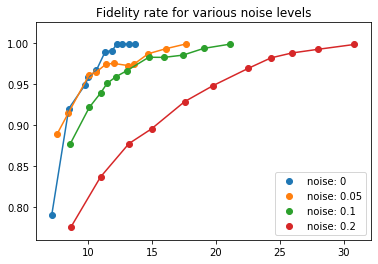

In [12]:
for i, noise in enumerate(noise_levels):
    points = curves[i]
    precisions = [point[1] for point in points]
    rates = [point[0] for point in points]
    plt.scatter(rates, precisions, label='noise: {}'.format(noise))
    plt.plot(rates, precisions)
    
plt.legend()
plt.title('Fidelity rate for various noise levels')
plt.savefig('fidelity_rate.png')
plt.show()

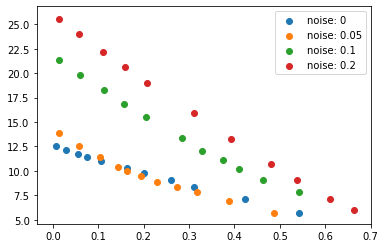

In [36]:
from sklearn.linear_model import LinearRegression
>>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_

for i, noise in enumerate(noise_levels):
    points = curves[i]
    precisions = [point[1] for point in points]
    rates = [point[0] for point in points]
    reg = LinearRegression().fit(X, y)
    